In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing data problems:

1. UnicodeDecodeError: "utf-8" codec can't decode byte in position : invalid start byte

   Solution: use `encoding='latin1'`

In [35]:
df = pd.read_csv("./csv", encoding='latin1')

## Data exploration

In [34]:
print(df.shape)
df.head()

(8830, 11)


University            Department Overall Pay  \
0   University of South Florida (UCF)      Medical Sciences     $28,500   
1            Stanford University (SU)                   NaN     $46,200   
2  Purdue University - West Lafayette  Chemical Engineering     $30,140   
3         Iowa State University (ISU)     Civil engineering     $24,604   
4           University of Denver (DU)            Mathemtics     $21,018   

   LW Ratio Academic Year Program Year 12 M Gross Pay 9 M Gross Pay  \
0      1.30     2020-2021          2nd        $28,500           NaN   
1      1.61     2020-2021          1st        $46,200           NaN   
2      1.42     2020-2021          1st        $31,000           NaN   
3      1.16     2020-2021          1st        $25,104           NaN   
4      0.94     2020-2021          2nd            NaN       $21,218   

  3 M Gross Pay  Fees                      Comments  
0           NaN   NaN                           NaN  
1           NaN   NaN                           NaN  
2           NaN  $860                           NaN  
3           NaN  $500                           NaN  
4           NaN  $200  Health Insurance is covered.

In [172]:
# basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830 entries, 0 to 8829
Data columns (total 11 columns):
University        8564 non-null object
Department        8364 non-null object
Overall Pay       8808 non-null object
LW Ratio          7904 non-null float64
Academic Year     8826 non-null object
Program Year      7799 non-null object
12 M Gross Pay    6294 non-null object
9 M Gross Pay     2512 non-null object
3 M Gross Pay     812 non-null object
Fees              3397 non-null object
Comments          2185 non-null object
dtypes: float64(1), object(10)
memory usage: 758.9+ KB


In [173]:
#gives basic statistics on numeric columns
df.describe()

LW Ratio
count  7904.000000
mean   1.078124   
std    0.833408   
min   -34.010000  
25%    0.850000   
50%    1.100000   
75%    1.300000   
max    40.970000

In [174]:
df.dtypes

University        object 
Department        object 
Overall Pay       object 
LW Ratio          float64
Academic Year     object 
Program Year      object 
12 M Gross Pay    object 
9 M Gross Pay     object 
3 M Gross Pay     object 
Fees              object 
Comments          object 
dtype: object

In [176]:
# shows which values are null
df.isnull().head()

# shows which columns have null values
df.isnull().any()

University        True
Department        True
Overall Pay       True
LW Ratio          True
Academic Year     True
Program Year      True
12 M Gross Pay    True
9 M Gross Pay     True
3 M Gross Pay     True
Fees              True
Comments          True
dtype: bool

In [178]:
# shows for each column the percentage of null values 

df.isnull().sum()/df.shape[0]
# equals to
df.isnull().mean()

University        0.030125
Department        0.052775
Overall Pay       0.002492
LW Ratio          0.104870
Academic Year     0.000453
Program Year      0.116761
12 M Gross Pay    0.287203
9 M Gross Pay     0.715515
3 M Gross Pay     0.908041
Fees              0.615289
Comments          0.752548
dtype: float64

In [180]:
df.columns

Index(['University', 'Department', 'Overall Pay', 'LW Ratio', 'Academic Year',
       'Program Year', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay',
       'Fees', 'Comments'],
      dtype='object')

# 1. General column operations

In [188]:
# rename columns
df.rename(columns={'3 M Gross Pay':'3_M_Gross_Pay'}).head()
df.rename(index={8:"3_M_Gross_Pay"}).head()

University            Department Overall Pay  \
0  University of South Florida (UCF)   Medical Sciences      $28,500      
1  Stanford University (SU)            NaN                   $46,200      
2  Purdue University - West Lafayette  Chemical Engineering  $30,140      
3  Iowa State University (ISU)         Civil engineering     $24,604      
4  University of Denver (DU)           Mathemtics            $21,018      

   LW Ratio Academic Year Program Year 12 M Gross Pay 9 M Gross Pay  \
0  1.30      2020-2021     2nd          $28,500        NaN            
1  1.61      2020-2021     1st          $46,200        NaN            
2  1.42      2020-2021     1st          $31,000        NaN            
3  1.16      2020-2021     1st          $25,104        NaN            
4  0.94      2020-2021     2nd          NaN            $21,218        

  3_M_Gross_Pay  Fees                      Comments  
0  NaN           NaN   NaN                           
1  NaN           NaN   NaN                           
2  NaN           $860  NaN                           
3  NaN           $500  NaN                           
4  NaN           $200  Health Insurance is covered.

In [280]:
# rename / cast index labels
print("Original index: ", df.index)

# cast index labels to string
df.rename(index=str).index

# use axis-style parameters
df.rename(str.lower, axis='columns').head()
df.rename({1:2, 2:4}, axis='index').head()

Original index:  RangeIndex(start=0, stop=8830, step=1)


University            Department Overall Pay  \
0  University of South Florida (UCF)   Medical Sciences      $28,500      
2  Stanford University (SU)            NaN                   $46,200      
4  Purdue University - West Lafayette  Chemical Engineering  $30,140      
3  Iowa State University (ISU)         Civil engineering     $24,604      
4  University of Denver (DU)           Mathemtics            $21,018      

   LW Ratio Academic Year Program Year 12 M Gross Pay 9 M Gross Pay  \
0  1.30      2020-2021     2nd          $28,500        NaN            
2  1.61      2020-2021     1st          $46,200        NaN            
4  1.42      2020-2021     1st          $31,000        NaN            
3  1.16      2020-2021     1st          $25,104        NaN            
4  0.94      2020-2021     2nd          NaN            $21,218        

  3_M_Gross_Pay  Fees                      Comments  
0  NaN           NaN   NaN                           
2  NaN           NaN   NaN                           
4  NaN           $860  NaN                           
3  NaN           $500  NaN                           
4  NaN           $200  Health Insurance is covered.

In [198]:
# view multiple columns by name

df[['University', 'Overall Pay']].head()
# equal to
df.loc[:,['University', 'Overall Pay']].head()

University Overall Pay
0  University of South Florida (UCF)   $28,500   
1  Stanford University (SU)            $46,200   
2  Purdue University - West Lafayette  $30,140   
3  Iowa State University (ISU)         $24,604   
4  University of Denver (DU)           $21,018

In [204]:
# view columns by index
# select via integer list
df.iloc[:,[0,2]].head()

# select via intiger slicing
df.iloc[:,0:2].head()

University            Department
0  University of South Florida (UCF)   Medical Sciences    
1  Stanford University (SU)            NaN                 
2  Purdue University - West Lafayette  Chemical Engineering
3  Iowa State University (ISU)         Civil engineering   
4  University of Denver (DU)           Mathemtics

#####################################################################################################################

In [251]:
# create a new dataFrame
dfa = pd.DataFrame(np.random.randn(8, 4), index=list(range(8)), columns=['A','B','C','D'])
print(dfa)

# create a new series
sa = pd.Series(np.random.randn(8), index=list('abcdefgh'))
print(sa)
print(sa.loc['c':])

# drop columns 
dfa.drop(['A','C'], axis =1) #add inplace = True to do save over current dataframe

# lambda function 
dfa.apply(lambda x: x.A**2, axis =1)

          A         B         C         D
0 -0.800665 -0.418592 -0.337132  0.088738
1 -0.283452 -0.153406  1.093071 -1.597823
2  0.432090  0.952050 -0.015279 -0.857157
3  0.164748 -1.908781  0.466974  0.428124
4  0.179124 -1.022229  0.791499 -1.058492
5 -0.352348 -0.211724 -0.311000 -0.474722
6 -0.083423 -0.598550  0.999855 -0.314110
7 -0.415050 -0.568635  2.291031 -1.247439
a   -2.066412
b    0.359775
c    1.762983
d   -1.156142
e    0.212013
f   -0.669103
g    0.047363
h    0.096548
dtype: float64
c    1.762983
d   -1.156142
e    0.212013
f   -0.669103
g    0.047363
h    0.096548
dtype: float64


0    0.641064
1    0.080345
2    0.186702
3    0.027142
4    0.032085
5    0.124149
6    0.006959
7    0.172267
dtype: float64

In [228]:
# select rows
dfa.loc[(dfa['D'] > 0.0) & (dfa.loc[:,'D'] < 1.0)]

A         B         C         D
0  0.465990  0.779814 -0.071823  0.623652
4  0.196913  0.943289 -0.801084  0.748673
7  1.265201  0.764451 -0.708751  0.651939

In [230]:
# pivot table

pd.pivot_table(dfa, index=['A','B'], values='D', columns='C')

C                    -1.315278  -1.200244  -0.801084  -0.708751  -0.071823  \
A         B                                                                  
-1.628775 -0.401824 NaN        NaN        NaN        NaN        NaN          
-0.611135  0.450875 NaN        NaN        NaN        NaN        NaN          
 0.196913  0.943289 NaN        NaN         0.748673  NaN        NaN          
 0.465990  0.779814 NaN        NaN        NaN        NaN         0.623652    
 0.699891 -0.166410 NaN         1.010538  NaN        NaN        NaN          
 1.265201  0.764451 NaN        NaN        NaN         0.651939  NaN          
 1.582235 -0.172836 -0.452275  NaN        NaN        NaN        NaN          
 1.651957 -1.469994 NaN        NaN        NaN        NaN        NaN          

C                     0.207951   0.434513   1.843686  
A         B                                           
-1.628775 -0.401824 NaN        NaN        -1.239027   
-0.611135  0.450875 NaN        -2.504836  NaN         
 0.196913  0.943289 NaN        NaN        NaN         
 0.465990  0.779814 NaN        NaN        NaN         
 0.699891 -0.166410 NaN        NaN        NaN         
 1.265201  0.764451 NaN        NaN        NaN         
 1.582235 -0.172836 NaN        NaN        NaN         
 1.651957 -1.469994 -1.126884  NaN        NaN

In [261]:
sa2 = sa.to_frame().reset_index(drop=True)

# merge  == JOIN in SQL, only happens if have one or more common keys
# pd.merge(dfa, sa2, left_on=None, right_on=None, left_index=False, right_index=False)

pd.concat([dfa, sa2], axis=1, join='inner')

dfa.append(sa, ignore_index=True)

# ref link: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

A         B         C         D         a         b         c  \
0 -0.800665 -0.418592 -0.337132  0.088738 NaN       NaN       NaN         
1 -0.283452 -0.153406  1.093071 -1.597823 NaN       NaN       NaN         
2  0.432090  0.952050 -0.015279 -0.857157 NaN       NaN       NaN         
3  0.164748 -1.908781  0.466974  0.428124 NaN       NaN       NaN         
4  0.179124 -1.022229  0.791499 -1.058492 NaN       NaN       NaN         
5 -0.352348 -0.211724 -0.311000 -0.474722 NaN       NaN       NaN         
6 -0.083423 -0.598550  0.999855 -0.314110 NaN       NaN       NaN         
7 -0.415050 -0.568635  2.291031 -1.247439 NaN       NaN       NaN         
8 NaN       NaN       NaN       NaN       -2.066412  0.359775  1.762983   

          d         e         f         g         h  
0 NaN       NaN       NaN       NaN       NaN        
1 NaN       NaN       NaN       NaN       NaN        
2 NaN       NaN       NaN       NaN       NaN        
3 NaN       NaN       NaN       NaN       NaN        
4 NaN       NaN       NaN       NaN       NaN        
5 NaN       NaN       NaN       NaN       NaN        
6 NaN       NaN       NaN       NaN       NaN        
7 NaN       NaN       NaN       NaN       NaN        
8 -1.156142  0.212013 -0.669103  0.047363  0.096548

#####################################################################################################################

## 2. Deal with missing values

In [40]:
# shows which values are null
df.isnull().head()

# shows which columns have null values
df.isnull().any()

# shows for each column the percentage of null values 

df.isnull().sum()/df.shape[0]
# equals to
df.isnull().mean()

University        0.030125
Department        0.052775
Overall Pay       0.002492
LW Ratio          0.104870
Academic Year     0.000453
Program Year      0.116761
12 M Gross Pay    0.287203
9 M Gross Pay     0.715515
3 M Gross Pay     0.908041
Fees              0.615289
Comments          0.752548
dtype: float64

In [61]:
df_use_index = df.columns[df.isnull().mean() < 0.3]
df_use_cols = set(df.columns[df.isnull().mean() < 0.3])
print('df_use_index = ', df_use_index)
print('df_use_cols = ', df_use_cols)

df_use_index =  Index(['University', 'Department', 'Overall Pay', 'LW Ratio', 'Academic Year',
       'Program Year', '12 M Gross Pay'],
      dtype='object')
df_use_cols =  {'12 M Gross Pay', 'University', 'Academic Year', 'LW Ratio', 'Department', 'Overall Pay', 'Program Year'}


In [121]:
df_analyze = df[[col for col in df_use_index]]
print(df_analyze.shape)
print(df_analyze.dtypes)
df_analyze.head()

(8830, 7)
University        object 
Department        object 
Overall Pay       object 
LW Ratio          float64
Academic Year     object 
Program Year      object 
12 M Gross Pay    object 
dtype: object


University            Department Overall Pay  \
0  University of South Florida (UCF)   Medical Sciences      $28,500      
1  Stanford University (SU)            NaN                   $46,200      
2  Purdue University - West Lafayette  Chemical Engineering  $30,140      
3  Iowa State University (ISU)         Civil engineering     $24,604      
4  University of Denver (DU)           Mathemtics            $21,018      

   LW Ratio Academic Year Program Year 12 M Gross Pay  
0  1.30      2020-2021     2nd          $28,500        
1  1.61      2020-2021     1st          $46,200        
2  1.42      2020-2021     1st          $31,000        
3  1.16      2020-2021     1st          $25,104        
4  0.94      2020-2021     2nd          NaN

In [288]:
df_analyze['LW Ratio'].fillna(df['LW Ratio'].median()).head()

df_analyze.dropna(subset=['University', 'Department', 'Overall Pay'], inplace=True).shape

(8259, 7)

## 3. String operations

### String operations are done on pd.series

In [169]:
df_analyze.head()

University            Department Overall Pay  \
0  University of South Florida (UCF)   Medical Sciences      $28,500      
1  Stanford University (SU)            NaN                   $46,200      
2  Purdue University - West Lafayette  Chemical Engineering  $30,140      
3  Iowa State University (ISU)         Civil engineering     $24,604      
4  University of Denver (DU)           Mathemtics            $21,018      

   LW Ratio Academic Year Program Year 12 M Gross Pay  
0  1.30      2020-2021     2nd          $28,500        
1  1.61      2020-2021     1st          $46,200        
2  1.42      2020-2021     1st          $31,000        
3  1.16      2020-2021     1st          $25,104        
4  0.94      2020-2021     2nd          NaN

In [295]:
## select rows by strings
# use '==True' to work around NaN values

df_analyze['University'].str.contains('Stanford' or 'stanford', regex=False) 

df_analyze[df_analyze['University'].str.contains('Stanford' or 'stanford', regex=False) == True].shape

(111, 7)

In [314]:
## upper & lower case methods

df_analyze['University'] = df_analyze['University'].str.lower()
df_analyze.Department = df_analyze.Department.str.lower()

/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [348]:
## split at positions & trim spaces before-after

df_analyze['University'] = df_analyze['University'].str.strip().str.split('(').str[0]
df_analyze['Department'] = df_analyze.Department.str.strip()

df_analyze['Program Year'] = df_analyze['Program Year'].str.slice(0,1).astype(float)

/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [324]:
## replace strings & change datatypes

df_analyze[['Overall Pay']] = df_analyze['Overall Pay'].str.replace('$', '').str.replace('-', '').str.replace(',', '')
df_analyze[['12 M Gross Pay']] = df_analyze['12 M Gross Pay'].str.replace('$', '').str.replace('-', '').str.replace(',', '')

df_analyze[['Overall Pay', '12 M Gross Pay']] = df_analyze[['Overall Pay', '12 M Gross Pay']].astype(float)

df_analyze['Academic Year'] = df_analyze.loc[df['Academic Year'].notnull(), 'Academic Year'].str.slice(0,4).astype(int)

/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/bingjieouyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [360]:
## check type of a collection of data

type(df_analyze['Program Year'])

## check data types

df_analyze['Overall Pay'].dtype
df_analyze.dtypes

University        object 
Department        object 
Overall Pay       float64
LW Ratio          float64
Academic Year     float64
Program Year      float64
12 M Gross Pay    float64
dtype: object

In [362]:
df_analyze.head()

University            Department  Overall Pay  \
0  university of south florida         medical sciences      28500.0       
2  purdue university - west lafayette  chemical engineering  30140.0       
3  iowa state university               civil engineering     24604.0       
4  university of denver                mathemtics            21018.0       
5  johns hopkins university            philosophy            29000.0       

   LW Ratio  Academic Year  Program Year  12 M Gross Pay  
0  1.30      2020.0         2.0           28500.0         
2  1.42      2020.0         1.0           31000.0         
3  1.16      2020.0         1.0           25104.0         
4  0.94      2020.0         2.0          NaN              
5  1.13      2020.0        NaN            29000.0

In [372]:
df_analyze.isnull().any()

University        False
Department        False
Overall Pay       False
LW Ratio          True 
Academic Year     True 
Program Year      True 
12 M Gross Pay    True 
dtype: bool

## 4. Count & rank the categories of a column

In [93]:
pd.set_option('display.max_rows', None)

Total number of universities:  599


Text(0,0.5,'Number of university entries')

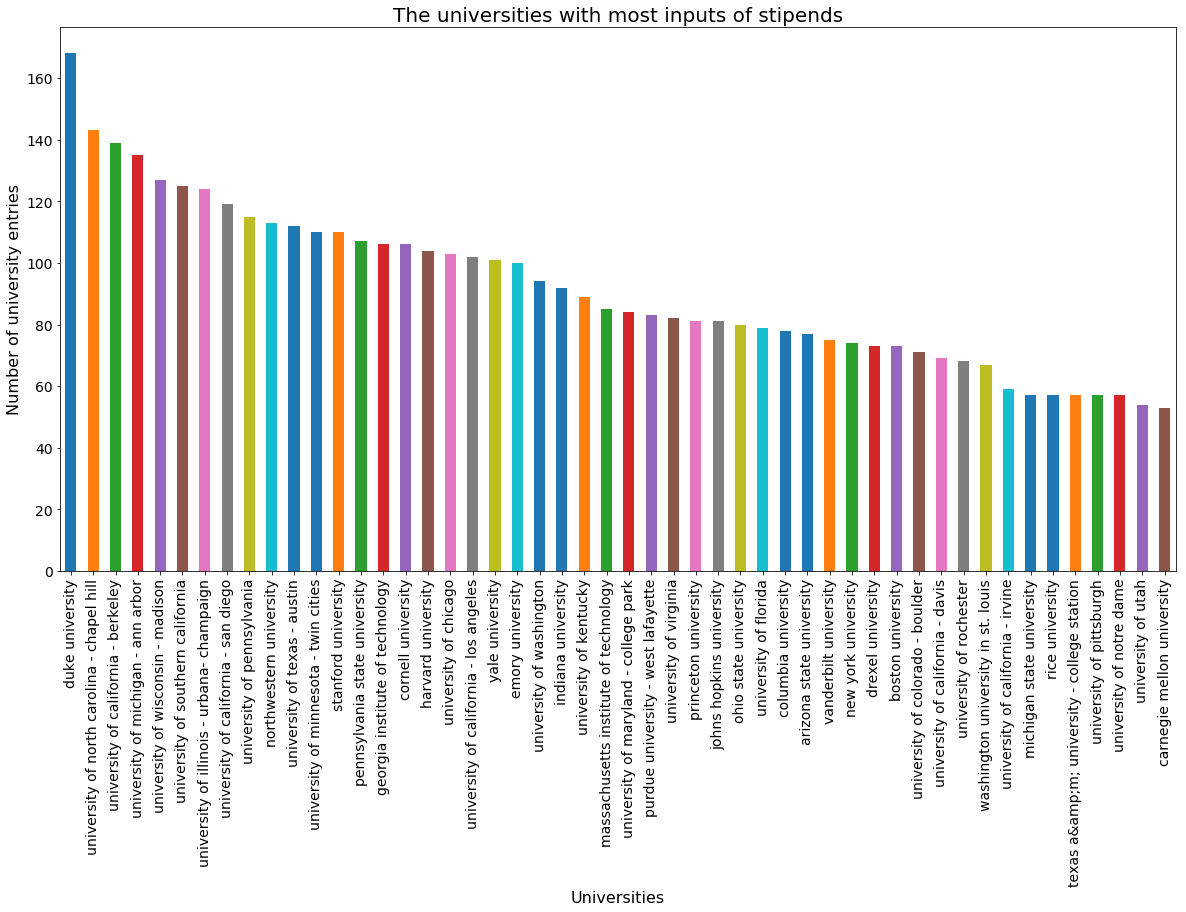

In [376]:
universities = df_analyze.University.value_counts()
print("Total number of universities: ", df_analyze.University.nunique())

## plot out the universities with top entries
## (universities[:50]/df_analyze.shape[0]).plot(kind="bar", figsize=(20,10), fontsize=14)
universities[:50].plot(kind="bar", figsize=(20,10), fontsize=14)
plt.title("The universities with most inputs of stipends", fontsize = 20)
plt.xlabel("Universities", fontsize=16)
plt.ylabel("Number of university entries", fontsize=16)

Total number of departments:  2000


Text(0,0.5,'Number of department entries')

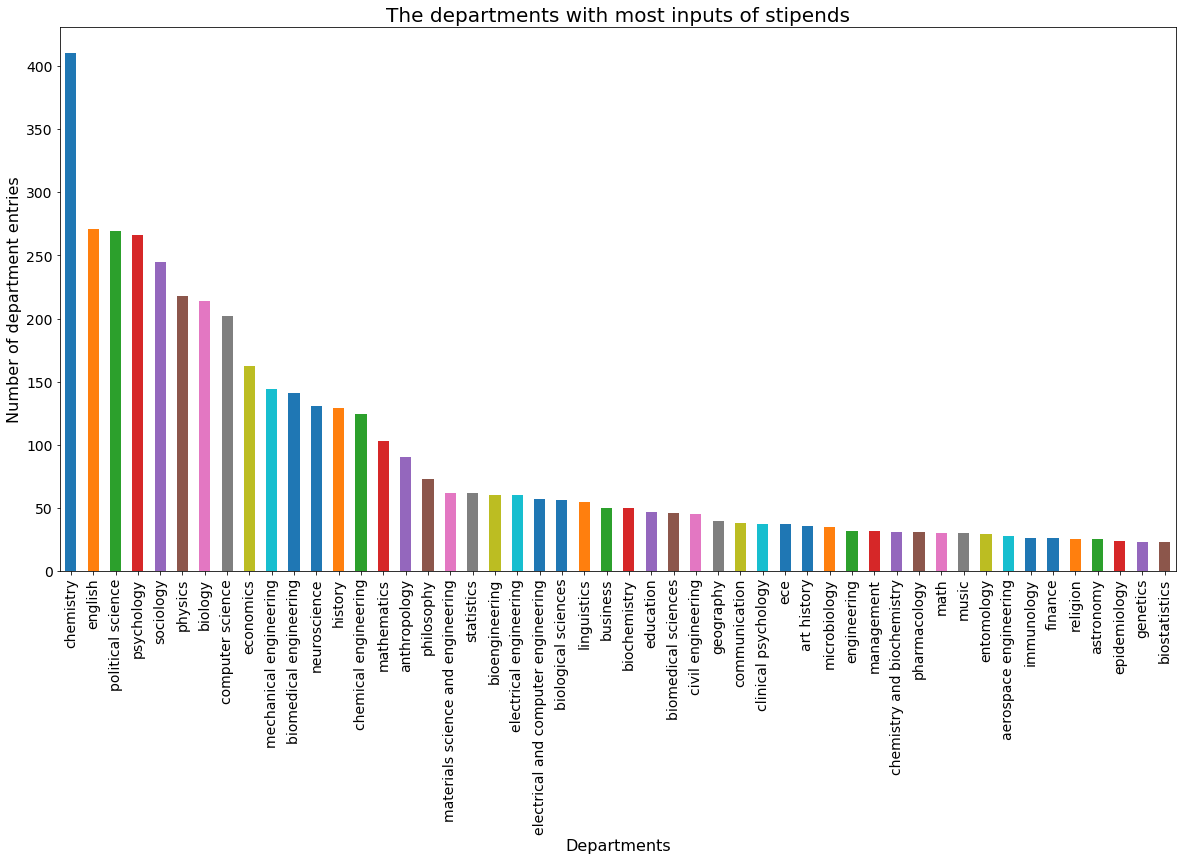

In [375]:
departments = df_analyze.Department.value_counts()
print("Total number of departments: ", departments.shape[0])

## plot out the universities with top entries
departments[:50].plot(kind="bar", figsize=(20,10), fontsize=14)
plt.title("The departments with most inputs of stipends", fontsize = 20)
plt.xlabel("Departments", fontsize=16)
plt.ylabel("Number of department entries", fontsize=16)

In [389]:
academicYear = df_analyze['Academic Year'].value_counts()
print("Total number of academic years: ", academicYear.shape[0])

academicYear

Total number of academic years:  20


2016.0    2008
2018.0    1765
2019.0    1327
2017.0    1139
2020.0    801 
2014.0    528 
2015.0    415 
2013.0    94  
2012.0    41  
2011.0    39  
2010.0    27  
2007.0    16  
2009.0    14  
2006.0    13  
2008.0    8   
2002.0    6   
2005.0    5   
2003.0    4   
2004.0    3   
2021.0    3   
Name: Academic Year, dtype: int64

In [388]:
programYear = df_analyze['Program Year'].value_counts()
print("Total number of academic years: ", programYear.shape[0])

programYear

Total number of academic years:  6


1.0    4240
2.0    1046
3.0    812 
4.0    633 
5.0    487 
6.0    239 
Name: Program Year, dtype: int64

## 5. Look into the numbers, sort, remove outliers, etc.

In [377]:
# sort by column name .sort(by=[''])
# sort by index .sort_index()
# sort series .sort_values()

df_analyze[df_analyze['University'].str.contains('stanford', regex=False) == True].sort_values(by=['Overall Pay'])

University                                  Department  \
6294  stanford university  education                                    
5857  stanford university  chemistry                                    
62    stanford university  center for east asian studies                
6796  stanford university  biotech                                      
8818  stanford university  graduate school of education                 
2266  stanford university  biophysics                                   
8763  stanford university  materials science and engineering            
8728  stanford university  mechanical engineering                       
8762  stanford university  materials science and engineering            
7367  stanford university  education                                    
5288  stanford university  gsb economic analysis and policy             
8146  stanford university  electrical engineering                       
7854  stanford university  plant biology                                
8561  stanford university  mechanical engineering                       
8550  stanford university  aeronautics & astronautics                   
5539  stanford university  theater and performance studies              
8347  stanford university  classics                                     
8333  stanford university  biosciences                                  
6514  stanford university  materials science and engineering            
8646  stanford university  psychology                                   
8338  stanford university  biomedical informatics                       
8233  stanford university  sociology                                    
2853  stanford university  business school                              
2147  stanford university  biology                                      
8082  stanford university  biosciences (phd)                            
8721  stanford university  cancer biology                               
7753  stanford university  religious studies                            
8501  stanford university  mechanical engineering                       
5440  stanford university  anthropology                                 
7811  stanford university  materials science and engineering            
6094  stanford university  applied physics                              
6206  stanford university  chemical biology                             
7865  stanford university  geological sciences                          
337   stanford university  theater and performance studies              
1273  stanford university  history/phd                                  
7403  stanford university  psychology                                   
8531  stanford university  economics                                    
5101  stanford university  earth system science                         
7485  stanford university  biosciences                                  
8221  stanford university  computational and mathematical engineering   
6377  stanford university  sociology                                    
3728  stanford university  sociology                                    
6859  stanford             microbiology                                 
4059  stanford university  physics                                      
7534  stanford university  chemistry                                    
7256  stanford university  bioengineering                               
3205  stanford university  biology                                      
7629  stanford university  linguistics                                  
5158  stanford university  psychology                                   
5743  stanford university  chemistry                                    
5048  stanford university  economics                                    
6515  stanford university  materials science and engineering            
6400  stanford university  artificial intelligence                      
8173  stanford university  biosciences                                  


In [379]:
df_analyze.sort_values(by = ['Overall Pay'])

University  \
5431  florida international university                                  
8450  duke university                                                   
6730  scumbag college                                                   
6683  university of kentucky                                            
6125  texas a&amp;m; university - college station                       
2271  iowa state university                                             
7229  university of california - berkeley                               
2551  harvard university                                                
3489  university of north carolina - chapel hill                        
4165  king fahd university of petroleum and minerals                    
354   northcentral university                                           
8180  georgia institute of technology                                   
5423  bilkent university                                                
4404  indian institute                                                  
8446  north carolina state university                                   
6736  university of colorado - boulder                                  
2365  universidade tiradentes                                           
7110  university of california - santa barbara                          
6737  university of colorado - boulder                                  
7966  cornell university                                                
18    wroclaw university of science and technology                      
7899  purdue university - west lafayette                                
7855  university of north carolina - chapel hill                        
8394  texas a&amp;m; university - college station                       
7435  georgia state university                                          
8689  university of wisconsin - madison                                 
3391  university of kent, canterbury                                    
4861  tribhuvan university                                              
6646  temple university                                                 
8230  kansas state university                                           
5883  duquesne university                                               
4200  university of georgia                                             
7020  university of puerto rico                                         
2246  kansas state university                                           
6065  london school of economics                                        
1103  university of wisconsin - madison                                 
11    claremont graduate university                                     
1301  university of queensland                                          
4253  central european university                                       
4655  university of illinois - chicago                                  
376   iowa state university                                             
1902  university of minnesota - twin cities                             
8204  oklahoma state university                                         
3642  oregon state university                                           
7132  university of california - riverside                              
4590  michigan state university                                         
1102  university of wisconsin - madison                                 
340   southern methodist university                                     
339   southern methodist university                                     
7375  university of wisconsin - madison                                 
7374  university of wisconsin - madison                                 
6551  illinois institute of technology                                  
5661  georgia institute of technology                                   
7318  university of illinois - chicago                                  
3441  university of wisconsin - madison     

In [383]:
df_analyze.loc[df_analyze['Academic Year'] == 2020.0].sort_values(by = ['Overall Pay'])

University  \
354   northcentral university                                      
18    wroclaw university of science and technology                 
11    claremont graduate university                                
376   iowa state university                                        
339   southern methodist university                                
340   southern methodist university                                
8     yale university                                              
268   university of arkansas - little rock                         
805   university of maryland - college park                        
265   university of texas - austin                                 
83    ohio university                                              
123   university of tennessee - knoxville                          
298   university of texas - dallas                                 
321   university of texas - dallas                                 
649   university of texas - dallas                                 
1010  university of texas - dallas                                 
657   university of minnesota - twin cities                        
197   illinois state university                                    
273   texas a&amp;m; university - college station                  
854   university of texas - austin                                 
936   texas a&amp;m; university - college station                  
547   lehigh university                                            
372   singapore university of technology and design                
398   university of michigan - ann arbor                           
669   new york university                                          
214   university of hong kong                                      
54    yale                                                         
890   duke university                                              
349   depaul university                                            
196   gallaudet university                                         
972   universidade federal de sao paulo                            
428   university of pennsylvania                                   
135   middle tennessee state university                            
1039  university of california - san diego                         
504   portland state university                                    
43    illinois institute of technology                             
148   university of north carolina - greensboro                    
787   virginia commonwealth university                             
149   university of north carolina - greensboro                    
89    stony brook university - suny                                
548   university of south carolina                                 
120   kent state university                                        
808   case western reserve university                              
48    rice university                                              
414   miami university                                             
153   university of wisconsin - milwaukee                          
599   florida atlantic university                                  
748   university of oklahoma                                       
681   university of akron                                          
850   the ohio state university                                    
894   university of alabama                                        
688   north carolina state university                              
427   carnegie mellon university                                   
488   university of nevada - las vegas                             
403   george washington university                                 
871   university of oregon                                         
774   washington state university                                  
773   washington state university                                  
86    tennessee state university          

### Checkout overall pay by department / field

In [429]:
## Finance

finance = df_analyze[df_analyze['Department'].str.contains('finance|economics', regex=True) == True].sort_values(by=['Overall Pay'], ascending=False)
finance['Overall Pay'].describe()

count    211.000000   
mean     31768.184834 
std      68706.528458 
min      800.000000   
25%      18944.000000 
50%      25500.000000 
75%      35000.000000 
max      994000.000000
Name: Overall Pay, dtype: float64

In [430]:
## Computer

computer = df_analyze[df_analyze['Department'].str.contains('computer', regex=True) == True].sort_values(by=['Overall Pay'], ascending=False)
computer['Overall Pay'].describe()

count    335.000000   
mean     26479.426866 
std      21061.223694 
min      555.000000   
25%      18743.000000 
50%      25000.000000 
75%      31180.500000 
max      275000.000000
Name: Overall Pay, dtype: float64

In [431]:
## Computer

geo = df_analyze[df_analyze['Department'].str.contains('geo', regex=True) == True].sort_values(by=['Overall Pay'], ascending=False)
geo['Overall Pay'].describe()

count    124.000000  
mean     22847.524194
std      9018.558245 
min      1462.000000 
25%      16875.000000
50%      22225.000000
75%      28000.000000
max      48636.000000
Name: Overall Pay, dtype: float64

### * Detect & remove outliers

In [401]:
## determine outlier range

print("The lowest 1% of the overall pay stipends are smaller than: {}".format(df_analyze['Overall Pay'].quantile(.005)))
print("The highest 1% of the overall pay stipends are greater than: {}".format(df_analyze['Overall Pay'].quantile(.995)))

The lowest 1% of the overall pay stipends are smaller than: 900.0
The highest 1% of the overall pay stipends are greater than: 65000.0


In [416]:
regularPay = df_analyze[(df_analyze['Overall Pay'] > df_analyze['Overall Pay'].quantile(.005)) & (df_analyze['Overall Pay'] < df_analyze['Overall Pay'].quantile(.995))]
print(regularPay.shape)

regularPay.head()

(8173, 7)


University            Department  Overall Pay  \
0  university of south florida         medical sciences      28500.0       
2  purdue university - west lafayette  chemical engineering  30140.0       
3  iowa state university               civil engineering     24604.0       
4  university of denver                mathemtics            21018.0       
5  johns hopkins university            philosophy            29000.0       

   LW Ratio  Academic Year  Program Year  12 M Gross Pay  
0  1.30      2020.0         2.0           28500.0         
2  1.42      2020.0         1.0           31000.0         
3  1.16      2020.0         1.0           25104.0         
4  0.94      2020.0         2.0          NaN              
5  1.13      2020.0        NaN            29000.0

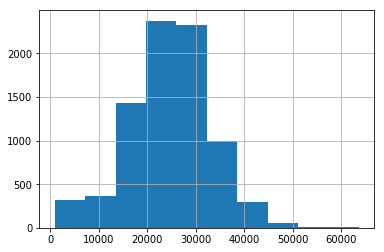

In [419]:
regularPay.boxplot('Overall Pay')
regularPay['Overall Pay'].hist()